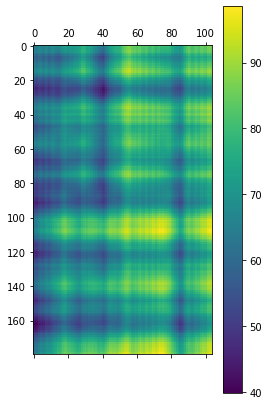

In [33]:
import matplotlib.pyplot as plt
import Bio.PDB
import numpy as numpy

pdb_code = "5JVG"
pdb_filename = "5JVG.pdb"

def calc_residue_dist(residue_one, residue_two) :
    """"Returns the C-alpha distance between two residues"""
    res_one = [* residue_one.get_atoms()][0]
    res_two = [* residue_two.get_atoms()][0]
  
    diff_vector  = res_one.get_coord() - res_two.get_coord()
    return numpy.sqrt(numpy.sum(diff_vector * diff_vector))


def calc_dist_matrix(chain_one, chain_two) :
    """Returns a matrix of C-alpha distances between two chains"""
    answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float)
    for row, residue_one in [* enumerate(chain_one)] :
        for col, residue_two in [* enumerate(chain_two)] :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer

structure = Bio.PDB.PDBParser(QUIET=True).get_structure(pdb_code, pdb_filename)


model = structure[0]
# print([* enumerate(model["L"])])
dist_matrix = calc_dist_matrix(model["L"], model["S"])

contact_map = dist_matrix < 200

plt.matshow(numpy.transpose(dist_matrix)) 
# plt.matshow(contact_map)                  
plt.colorbar()
plt.show()
